#  <span style='background-color:#838B8B'> <font color='	#FFB90F'>Unsupervised Learning </font></span>

## <font color= '#FFA500'> Loading Libraries </font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer,StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import warnings

## 1. <font color= '#FFA500'> Loading Wine Data to Environment</font>

In [3]:
df=pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\ICT Academy\CS09 Wine.csv')

### <font color= '#EE9A00'> Fletching the basic details of the data set</font>

#### (i) Dimension of data.

In [4]:
print('The no of row and columns are',df.shape)

The no of row and columns are (178, 13)


#### (ii) The first 10 rows of data set.

In [5]:
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#### (iii) The Statistic of data & detail data information.

In [6]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


__Interpretation__<br> Which is clear that the all variable are quantitative variables, among the all only two variable were integers.

#### (iv) Checking Missing values in data set.

In [8]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

__Interpretation__<br> Since we don't have missing values in these 14 variables column. We have to go for further procedures such as Scaling, Here i prefer Normal scaling.

#### (v) Normalizing.

In [9]:
#creating an instance for making normalizing the data.
normalize=Normalizer()

In [10]:
df_norm=normalize.fit_transform(df)
#Convert array into DataFrame
df_norm=pd.DataFrame(df_norm)
df_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.018364,0.007568,0.003282,0.027460,0.127252,0.002250,0.000817,0.000697,0.001420,0.010314,0.000857,0.002331,0.991225
174,0.017691,0.005162,0.003274,0.030366,0.134666,0.002376,0.000990,0.000568,0.001862,0.009638,0.000924,0.002060,0.990194
175,0.015723,0.005071,0.002678,0.023697,0.142180,0.001884,0.000818,0.000509,0.001600,0.012085,0.000699,0.001848,0.989336
176,0.015514,0.003051,0.002792,0.023559,0.141355,0.001944,0.000801,0.000624,0.001720,0.010955,0.000707,0.001908,0.989482


In [11]:
df_norm.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.019950,0.003711,0.003644,0.031124,0.151541,0.003444,0.002973,0.000581,0.002396,0.007342,0.001477,0.003993,0.986018
std,0.007321,0.002499,0.001409,0.014671,0.054081,0.001543,0.001802,0.000327,0.001249,0.003843,0.000736,0.001979,0.010073
min,0.008428,0.000944,0.001473,0.007739,0.064147,0.001255,0.000637,0.000145,0.000554,0.002241,0.000579,0.001675,0.951812
25%,0.013548,0.001684,0.002359,0.017615,0.109775,0.002385,0.001746,0.000277,0.001515,0.004612,0.000970,0.002535,0.981687
50%,0.018984,0.003174,0.003468,0.030036,0.146777,0.002946,0.002721,0.000514,0.002030,0.005981,0.001232,0.003384,0.988441
75%,0.024783,0.004981,0.004506,0.040010,0.183082,0.003886,0.003551,0.000833,0.003040,0.008853,0.001834,0.004870,0.993564
max,0.041106,0.014852,0.007305,0.069703,0.297958,0.008404,0.010560,0.002008,0.007469,0.021876,0.004727,0.010858,0.997835


#### (vi) Pair plot for finding basic relationship.

In [13]:
df_norm.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.622933,0.937655,0.931707,0.923765,0.768091,0.546079,0.763890,0.658293,0.391976,0.787111,0.781890,-0.909216
1,0.622933,1.000000,0.624186,0.625018,0.560278,0.345259,0.129154,0.569601,0.349392,0.406480,0.248719,0.346413,-0.524503
2,0.937655,0.624186,1.000000,0.966469,0.915833,0.747199,0.552455,0.780879,0.638728,0.381690,0.746700,0.754067,-0.902470
3,0.931707,0.625018,0.966469,1.000000,0.893949,0.721428,0.523273,0.784572,0.642503,0.370815,0.725639,0.745225,-0.880424
4,0.923765,0.560278,0.915833,0.893949,1.000000,0.735260,0.542252,0.681611,0.651128,0.352745,0.758161,0.735390,-0.979412
5,0.768091,0.345259,0.747199,0.721428,0.735260,1.000000,0.866762,0.449456,0.803863,0.085820,0.782218,0.882161,-0.761313
6,0.546079,0.129154,0.552455,0.523273,0.542252,0.866762,1.000000,0.219788,0.774066,-0.132981,0.681176,0.840879,-0.599217
7,0.763890,0.569601,0.780879,0.784572,0.681611,0.449456,0.219788,1.000000,0.399445,0.377529,0.565926,0.491640,-0.648862
8,0.658293,0.349392,0.638728,0.642503,0.651128,0.803863,0.774066,0.399445,1.000000,0.074621,0.655405,0.782872,-0.668158
9,0.391976,0.406480,0.381690,0.370815,0.352745,0.085820,-0.132981,0.377529,0.074621,1.000000,-0.049333,-0.072367,-0.304251


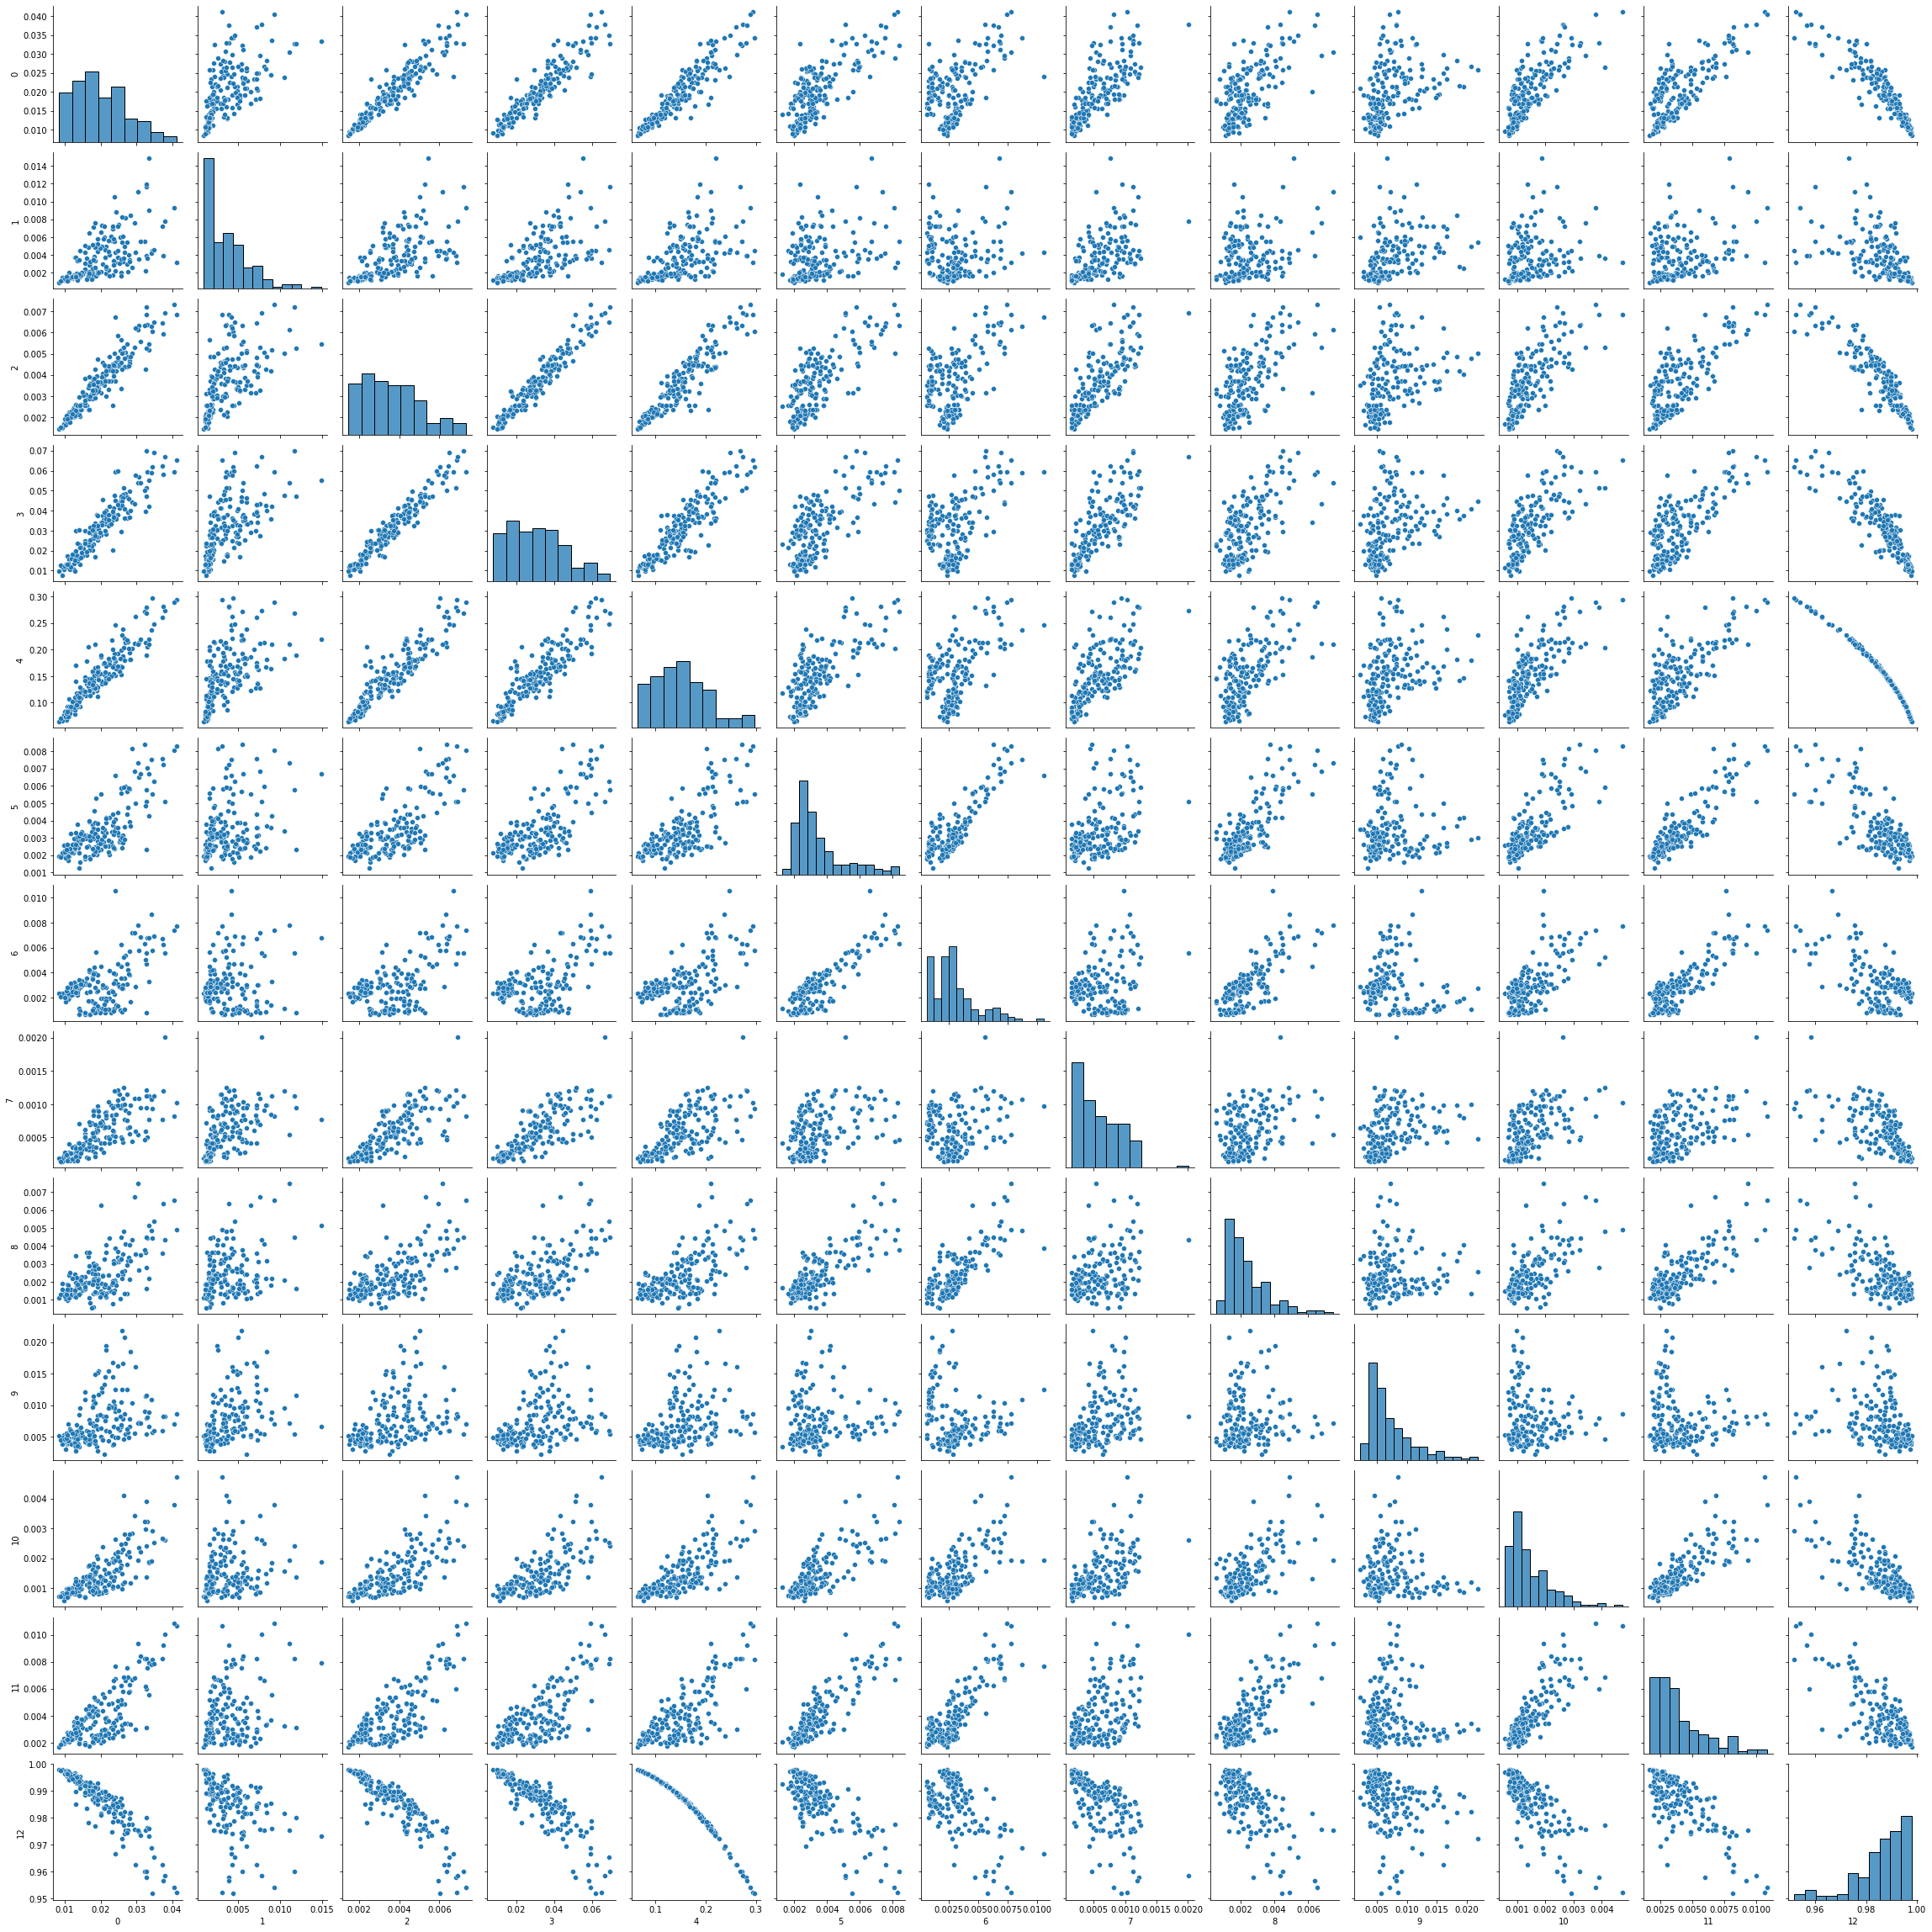

In [29]:
sns.pairplot(df_norm)

__Interpretation :__<br> we can see that most of variables are linear related to each other but the normalilty of is not met for many variables, which is some of have more than uni modal, some of are positively skewed or negatively skewed. But that doesn't matter for clustering.

##   2 & 3 <font color= '#006400'> Clustering and Optimal no of cluster for each method </font>

### <font color= '#808080'> K-Means Clustering </font>

In [21]:
#Create range of possible k values.
k=range(1,10)
#Create a empty set for the values of optimal k's.
WCSS=[]
#Create loop for finding the optimal cluster.
for i in k:
    model=KMeans(n_clusters=i,init='k-means++',random_state=35)
    model.fit(df_norm)
    WCSS.append(model.inertia_)
    print(model.inertia_)
    warnings.warn("this will not show")

0.5893776280459067
0.21097561296654627
0.10306150549665624
0.0591007341301072
0.03969232820057102
0.031225513619485036
0.0271936330693556
0.02348268006894711
0.021503693696326834


### <font color= '#808080'> Elbow method plot </font>

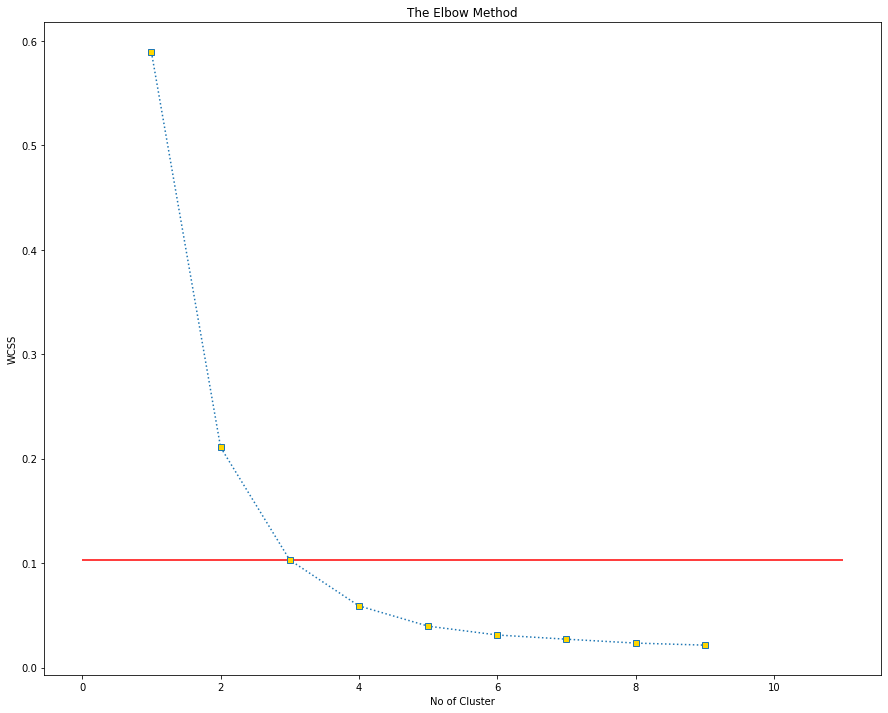

In [15]:
plt.figure(figsize=(15,12))
plt.plot(range(1,10),WCSS,':s',markerfacecolor='gold')
plt.title('The Elbow Method')
plt.xlabel('No of Cluster')
plt.ylabel('WCSS')
plt.hlines(0.10306150549665624,0,11,colors='red')
plt.show()

__Conclusion :__<Br> Here we know that from the 1 to 2 clsuter variation within has decreased significantly and from 3 to 10 the variation has no significant changes but still decreasing so we can say that optimal no of cluster is 3, also red line shows the minimum significant changes in variation within the clusters.

### <font color= '#808080'> K-Means Cluster using k =3 </font>    

In [16]:
model=KMeans(n_clusters=3,init='k-means++',random_state=30)
y=model.fit_predict(df_norm)
print(y)

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 1 1 2 2 2 2 1 0 1 2 2
 0 1 1 1 2 1 1 0 2 2 2 1 2 2 0 0 2 2 2 1 1 2 1 2 2 1 2 2 1 1 2 1 2 2 1 2 2
 1 2 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2
 2 1 1 1 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [18]:
df_k=df.copy()
df_k['Predictions']=y
df_k.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Predictions
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


Here we have made a new dataframe which is consist of the predictions of cluster along with wine data.

### <font color= '#808080'> Boxplot for Each variable where group by the prediction variable. </font>

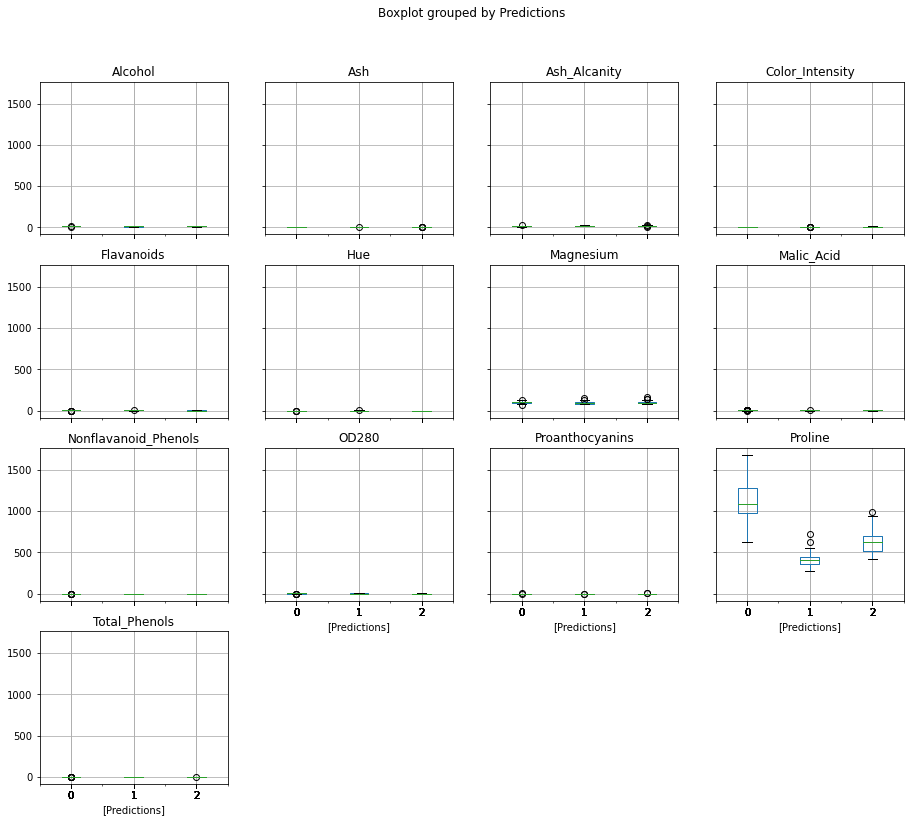

In [20]:
df_k.boxplot(by='Predictions',figsize=(15,13))
warnings.filterwarnings('ignore')

__Interpretation__<br> Here we can't cluster the into any categories because none is given. So, we say that cluster 0 type wine contains more nitrogen content than any other cluster type because proline increases means nitro-content will also increases. And all other content seems equally distributed for all type of wine clusters.

### <font color= '#8B7D7B'> Agglomerative Clustering. </font>

Here we have to find the optimal cluster value using denrogram.

### <font color= '#8B7D7B'> Denrogram. </font>

In [22]:
# Create a linkage instance inorder to create a denrogram.
linked=linkage(df_norm,method='ward')

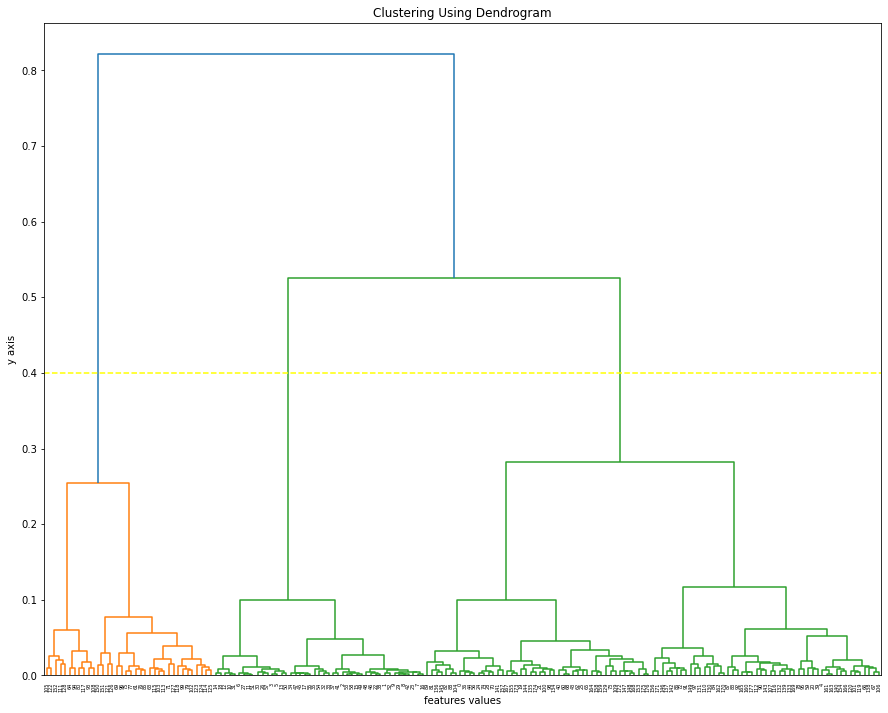

In [25]:
#Now we plot denrogram in order to find the optimal value of cluster.
plt.figure(figsize=(15,12))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.title('Clustering Using Dendrogram')
plt.xlabel('features values')
plt.ylabel('y axis')
plt.hlines(0.4,0,10000,colors='#FFFF00',linestyles='dashed')
plt.show()

__Conclusion :__<br> So we can say that the optimum no of clusters is 3 because the horizontal line which cut the maximum distance is only cut three lines, or we can find the no of clusters by identifing the no of colours used in this denrogram.

### <font color= '#8B7D7B'> Agglomerative Hierarchial Clustering using k = 3. </font>

In [26]:
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y1=cluster.fit_predict(df_norm)
y1

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [27]:
df_a=df.copy()
df_a['Predictions']=y1
df_a.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Predictions
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


Here we have made a new dataframe which is consist of the predictions of cluster along with wine data.

### <font color= '#808080'> Boxplot for Each variable where group by the prediction variable. </font>

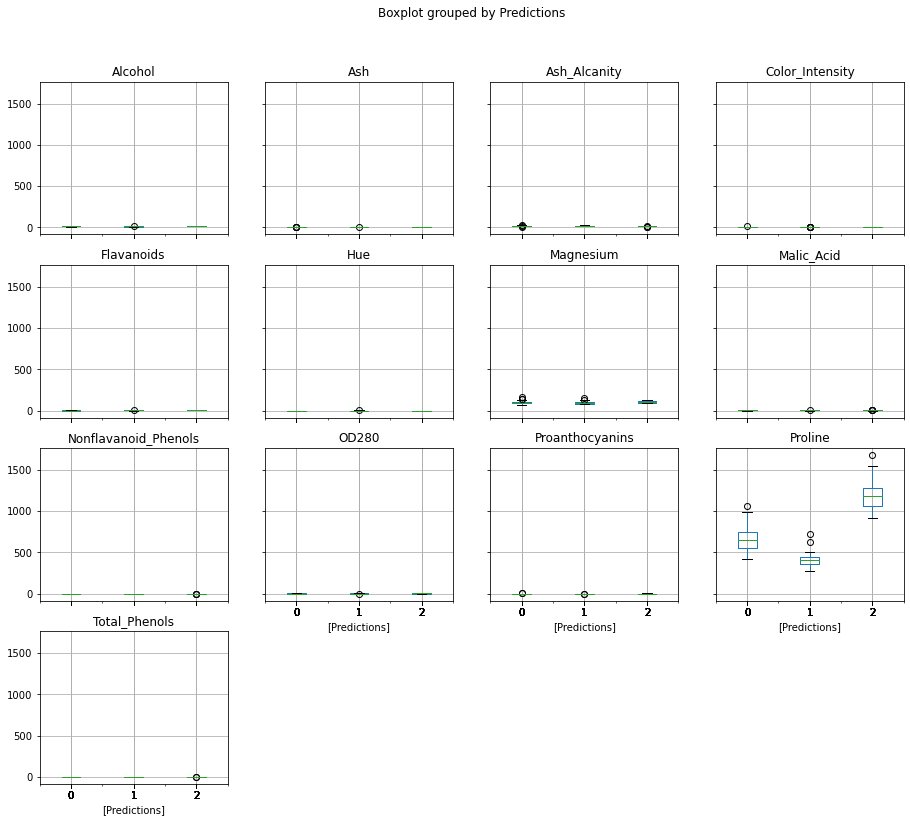

In [28]:
df_a.boxplot(by='Predictions',figsize=(15,13))
warnings.filterwarnings('ignore')

__Comparing__<br> Here we can say that Cluster 2 wine contains more nitrogen content than other groups. All other seems approximately equally distributed.